In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallamahgoub/diabetes")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 8.89k/8.89k [00:00<00:00, 852kB/s]

Extracting model files...
Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\abdallamahgoub\diabetes\versions\1


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diabetes dataset (replace with the correct path to the dataset file)
df = pd.read_csv(r"C:\Users\HP\.cache\kagglehub\datasets\abdallamahgoub\diabetes\versions\1\diabetes.csv")  

print()
# Check the first few rows to understand the dataset
print(df.head())

# Checking for any missing values
print()
print(" Null values")
print(df.isnull().sum())

# Replace missing values or drop rows (if necessary)
print()
print("Fill null values")
df.fillna(df.mean(), inplace=True)  # Replace NaN with column mean




   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  

 Null values
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

Fill null values


In [8]:
# Define features and target
X = df.drop(columns=["Outcome"])  # All columns except 'Outcome' are features
y = df["Outcome"]  # 'Outcome' is the target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' based on experimentation

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

In [9]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Error rate
error_rate = 1 - accuracy

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [10]:
# Display results
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Confusion Matrix:
[[79 20]
 [27 28]]
Accuracy: 0.6948
Error Rate: 0.3052
Precision: 0.5833
Recall: 0.5091


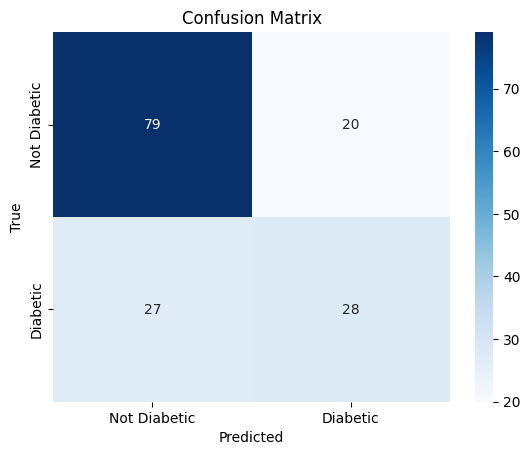

In [11]:
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Diabetic", "Diabetic"], yticklabels=["Not Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()